# Bagging Technique!

**References:**

https://www.simplilearn.com/tutorials/machine-learning-tutorial/bagging-in-machine-learning

https://vitalflux.com/bagging-classifier-python-code-example/

### Contents:

1. <a href = "#Introduction:">Introduction</a>
2. <a href = "#What-Is-Bootstrapping?">What Is Bootstrapping?</a>
3. <a href = "#Steps-to-Perform-Bagging">Steps to Perform Bagging</a>
4. <a href = "#Advantages-of-Bagging-in-Machine-Learning">Advantages of Bagging in Machine Learning</a>
5. <a href = "#When-to-use-Bagging-Classifier?">When to use Bagging Classifier?</a>
6. <a href = "#Lets-get-into-the-code">Code for bagging Classifier</a>

### Introduction:

Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model. Bagging avoids overfitting of data and is used for both regression and classification models, specifically for decision tree algorithms.

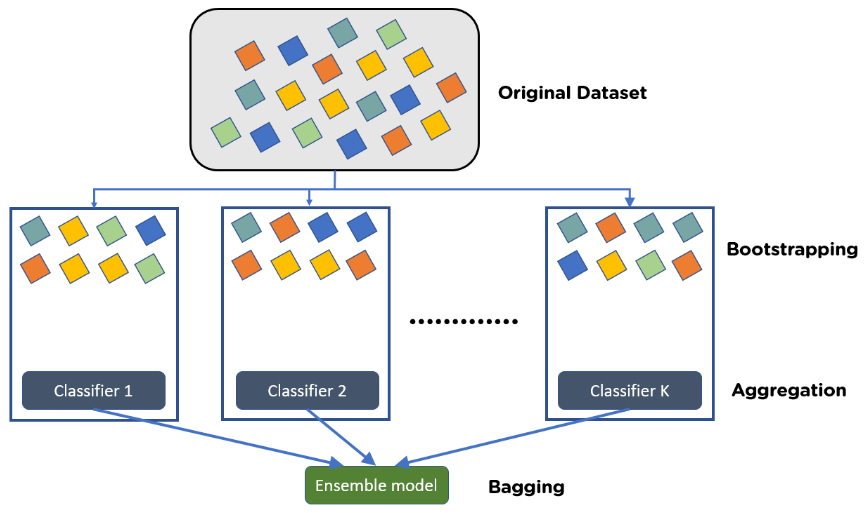

### What Is Bootstrapping?

Bootstrapping is the method of randomly creating samples of data out of a population with replacement to estimate a population parameter.

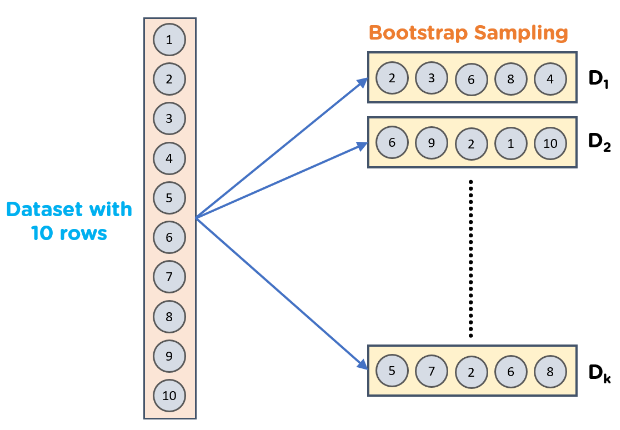

### Steps to Perform Bagging

- Consider there are n observations and m features in the training set. You need to select a random sample from the training dataset without replacement
- A subset of m features is chosen randomly to create a model using sample observations
- The feature offering the best split out of the lot is used to split the nodes
- The tree is grown, so you have the best root nodes
- The above steps are repeated n times. It aggregates the output of individual decision trees to give the best prediction

### Advantages of Bagging in Machine Learning

- Bagging minimizes the overfitting of data
- It improves the model’s accuracy
- It deals with higher dimensional data efficiently

### When to use Bagging Classifier?

Bagging classifier helps reduce the variance of unstable classifiers (having high variance). The unstable classifiers include classifiers trained using algorithms such as decision tree which is found to have high variance and low bias. Thus, one can get the most benefit from using a bagging classifier for algorithms such as decision trees. The stable classifiers such as linear discriminant analysis which have low variance may not benefit much from the bagging technique.

#### Lets get into the code

In [1]:
# Importing the libraries!

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the breast cancer dataset
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [3]:
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [4]:
# Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

In [5]:
# Fit the model
#
pipeline.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.965,  Model training Score: 0.991


The model comes up with the following scores. Note that the model tends to overfit the data as the test score is 0.965 and the training score is 0.991.

#### Model fit using Bagging Classifier

In this section, we will fit a bagging classifier using different hyperparameters such as the following and base estimator as pipeline built using Logistic Regression. Note that you can further perform a Grid Search or Randomized search to get the most appropriate estimator.

- n_estimators = 100
- max_features = 10
- max_samples = 100

In [6]:
# Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.958,  Model training Score: 0.972


In [ ]:
#no errors:tested

The model comes up with the following scores. Note that the model tends to overfit the data as the test score is 0.965 and the training score is 0.974. However, the model will give better generalization performance than the model fit with Logistic Regression.

[<a href="#Contents:">Back to Content</a>]

**THE END**